In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
path = r'C:\Users\HP\Anaconda Scripts\My Course\Personal Projects\Exploratory Data Analysis of Movie Trends'

prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data', 'movies_data.csv')
movies_data_clean = pd.read_csv(prepared_data_path)

In [19]:
# Define the scaling factor (1 Billion) for clean plotting
BILLION = 1_000_000_000

In [10]:
# Create a temporary DataFrame for plotting with scaled financial values
df_plot = movies_data_clean.copy()
df_plot['budget_B'] = df_plot['budget'] / BILLION
df_plot['revenue_B'] = df_plot['revenue'] / BILLION

## 1. Budget vs Revenue scatter plot

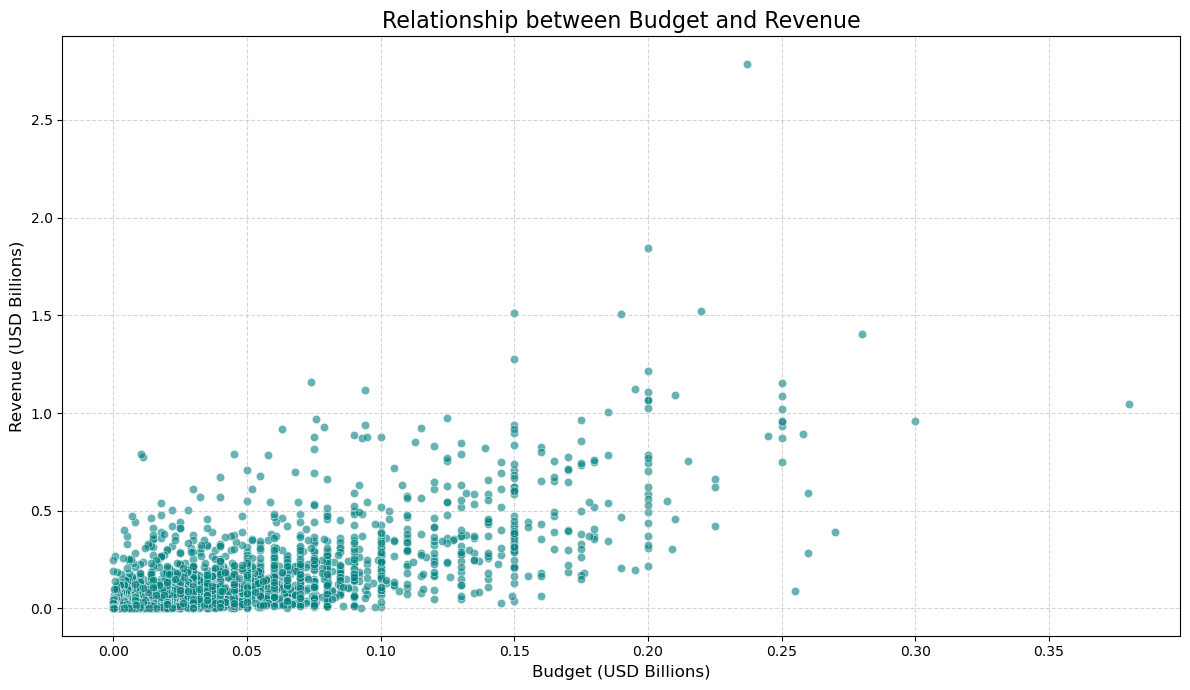

In [11]:
plt.figure(figsize=(12, 7))

# Use the scaled data columns for the plot
sns.scatterplot(data=df_plot, x='budget_B', y='revenue_B', alpha=0.6, color='teal')
plt.title("Relationship between Budget and Revenue", fontsize=16)

# Update labels to reflect the Billions scale
plt.xlabel("Budget (USD Billions)", fontsize=12)
plt.ylabel("Revenue (USD Billions)", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
# Calculate and print correlation (using the original, unscaled data)
budget_revenue_corr = movies_data_clean['budget'].corr(movies_data_clean['revenue'])
print(f"Correlation between Budget and Revenue: {budget_revenue_corr:.3f}")

Correlation between Budget and Revenue: 0.705


## 2. Ratings vs Revenue scatter plot

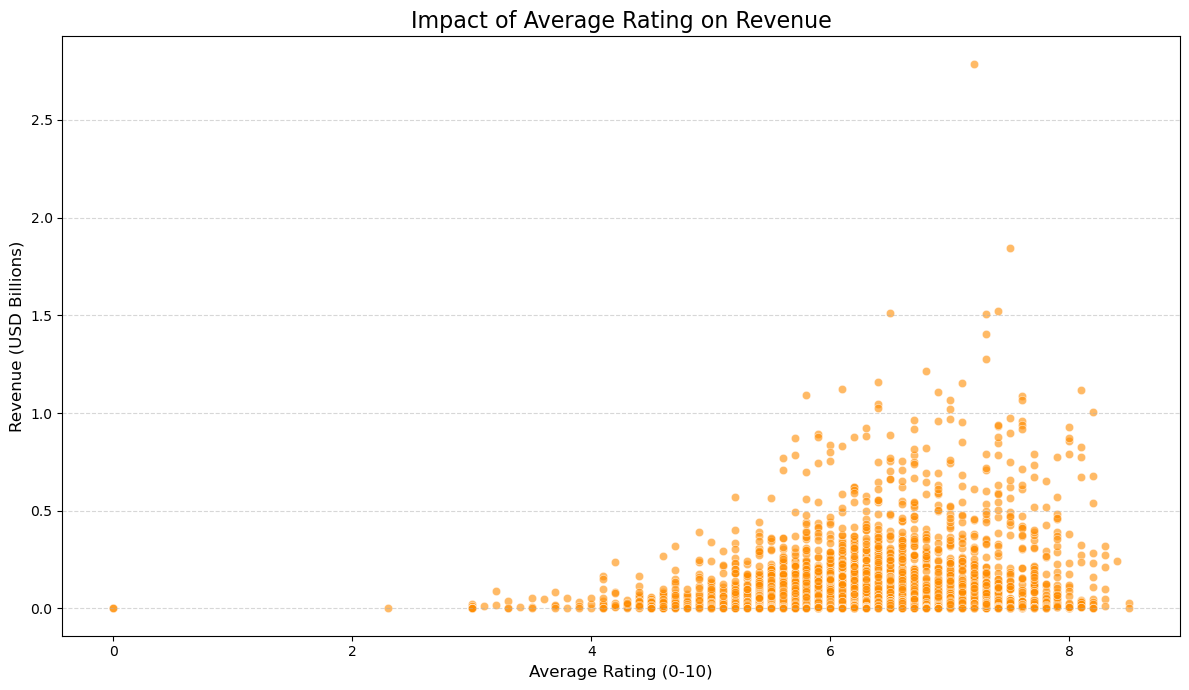

In [13]:
plt.figure(figsize=(12, 7))

# Use the scaled revenue data column for the plot
sns.scatterplot(data=df_plot, x='vote_average', y='revenue_B', alpha=0.6, color='darkorange')
plt.title("Impact of Average Rating on Revenue", fontsize=16)
plt.xlabel("Average Rating (0-10)", fontsize=12)

# Update Y-axis label
plt.ylabel("Revenue (USD Billions)", fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
# Calculate and print correlation
rating_revenue_corr = movies_data_clean['vote_average'].corr(movies_data_clean['revenue'])
print(f"Correlation between Average Rating and Revenue: {rating_revenue_corr:.3f}")

Correlation between Average Rating and Revenue: 0.188


## 3. ROI distribution

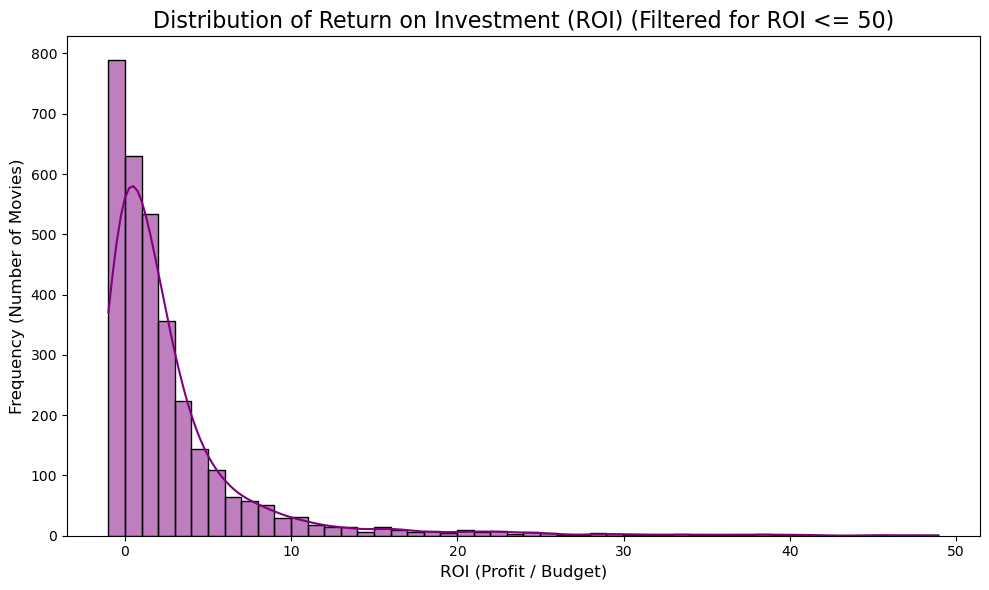

In [15]:
roi_threshold = 50 

plt.figure(figsize=(10, 6))
sns.histplot(
    data=movies_data_clean[movies_data_clean['ROI'] <= roi_threshold], 
    x='ROI', 
    bins=50, 
    kde=True,
    color='purple'
)
plt.title(f"Distribution of Return on Investment (ROI) (Filtered for ROI <= {roi_threshold})", fontsize=16)
plt.xlabel("ROI (Profit / Budget)", fontsize=12)
plt.ylabel("Frequency (Number of Movies)", fontsize=12)
plt.tight_layout()
plt.show()

## 4. Correlation Heatmap

In [16]:
# Select numerical columns for correlation
numerical_cols = ['budget', 'revenue', 'profit', 'runtime', 'vote_average', 'vote_count', 'ROI']
correlation_matrix = movies_data_clean[numerical_cols].corr()

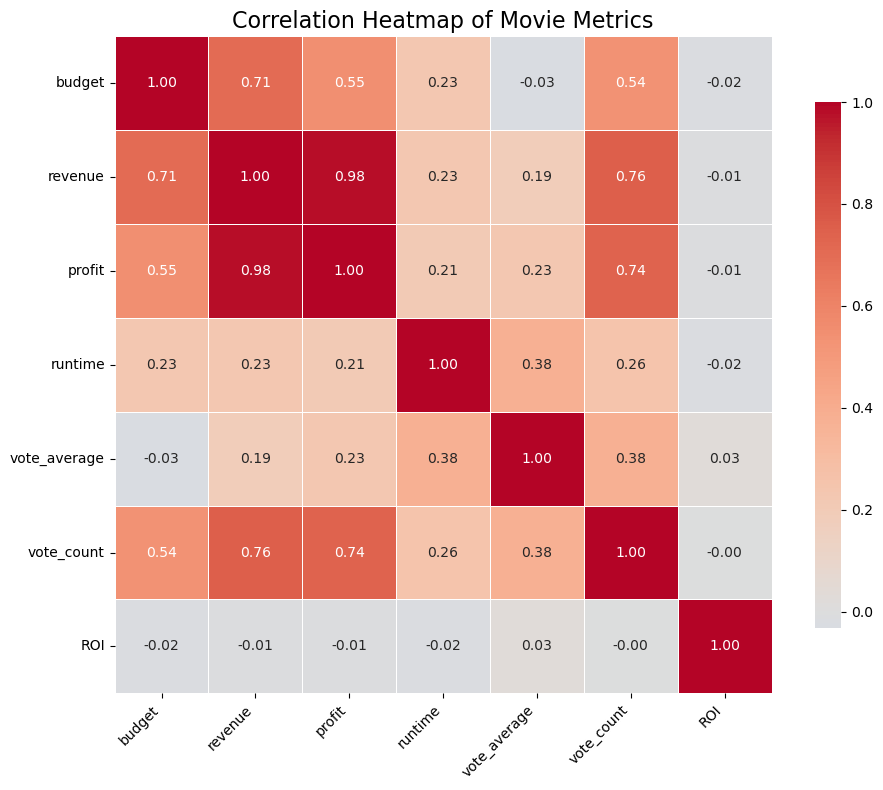

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    fmt='.2f', 
    linewidths=.5, 
    cbar_kws={'shrink': .8} 
)
plt.title("Correlation Heatmap of Movie Metrics", fontsize=16)
# Rotate x-axis labels for better fit and readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()